# Diferenciação - Estudos Part19 Séries Temporais

In [1]:
# importando os módulos
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


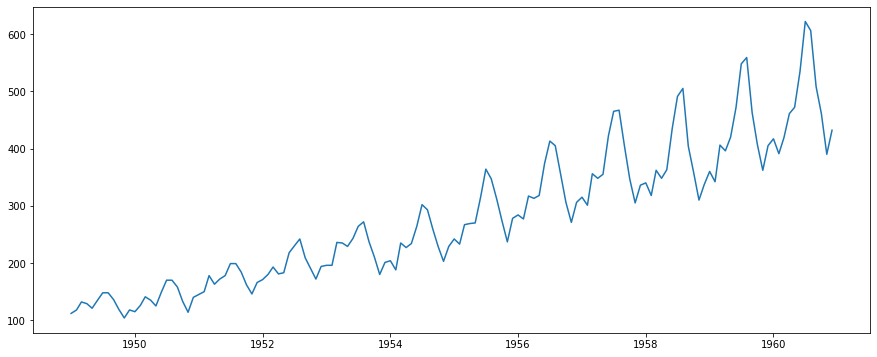

In [4]:
plt.plot(data)

In [5]:
y = data['#Passengers']

In [15]:
# Desenvolvendo uma função para testa a estacionaridade
def adf_test(y):
    print('Resultado do Teste Dickey-Fuller')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de Lgs', '# de Observações'])
    for key, values in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = values
    print(dfoutput)

In [16]:
adf_test(y)

Resultado do Teste Dickey-Fuller
Teste                    0.815369
Valor P                  0.991880
# de Lgs                13.000000
# de Observações       130.000000
Valor Crítico (1%)      -3.481682
Valor Crítico (5%)      -2.884042
Valor Crítico (10%)     -2.578770
dtype: float64


In [17]:
# Aplicando a diferenciação
y_diff = np.diff(y)

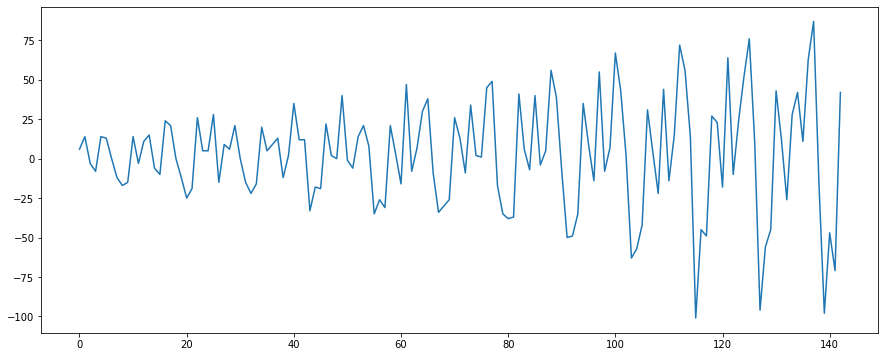

In [19]:
plt.plot(y_diff)

In [20]:
# Testando se a diferenciação tornou ela estacionaria
adf_test(y_diff)

Resultado do Teste Dickey-Fuller
Teste                   -2.829267
Valor P                  0.054213
# de Lgs                12.000000
# de Observações       130.000000
Valor Crítico (1%)      -3.481682
Valor Crítico (5%)      -2.884042
Valor Crítico (10%)     -2.578770
dtype: float64


In [21]:
# Aplicando a diferenciação de 2° ordem
y_diff2 = np.diff(y_diff)

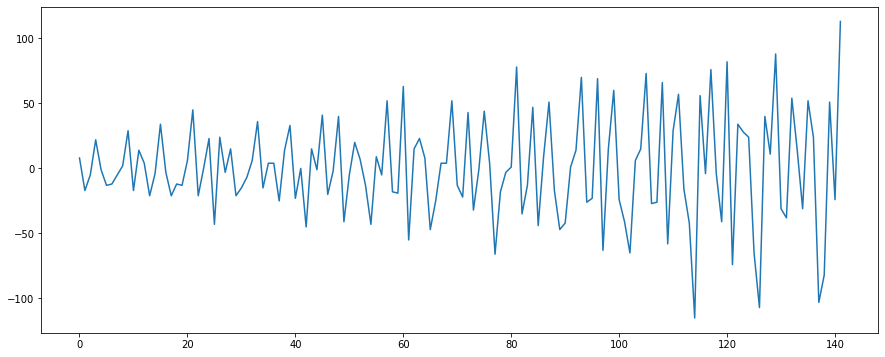

In [23]:
plt.plot(y_diff2)

In [24]:
# Testando novamente
adf_teste(y_diff2)

Resultado do Teste Dickey-Fuller
Teste                 -1.638423e+01
Valor P                2.732892e-29
# de Lgs               1.100000e+01
# de Observações       1.300000e+02
Valor Crítico (1%)    -3.481682e+00
Valor Crítico (5%)    -2.884042e+00
Valor Crítico (10%)   -2.578770e+00
dtype: float64
